<a href="https://colab.research.google.com/github/acrisandradee/Algoritmos-IA-para-classificacao-/blob/main/PDAlgoritmos_IA_para_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça o módulo do Kaggle Intro to Machine Learning:https://www.kaggle.com/learn/intro-to-machine-learning

Comprove a finalização do módulo com um print que contenha data e identificação do aluno.



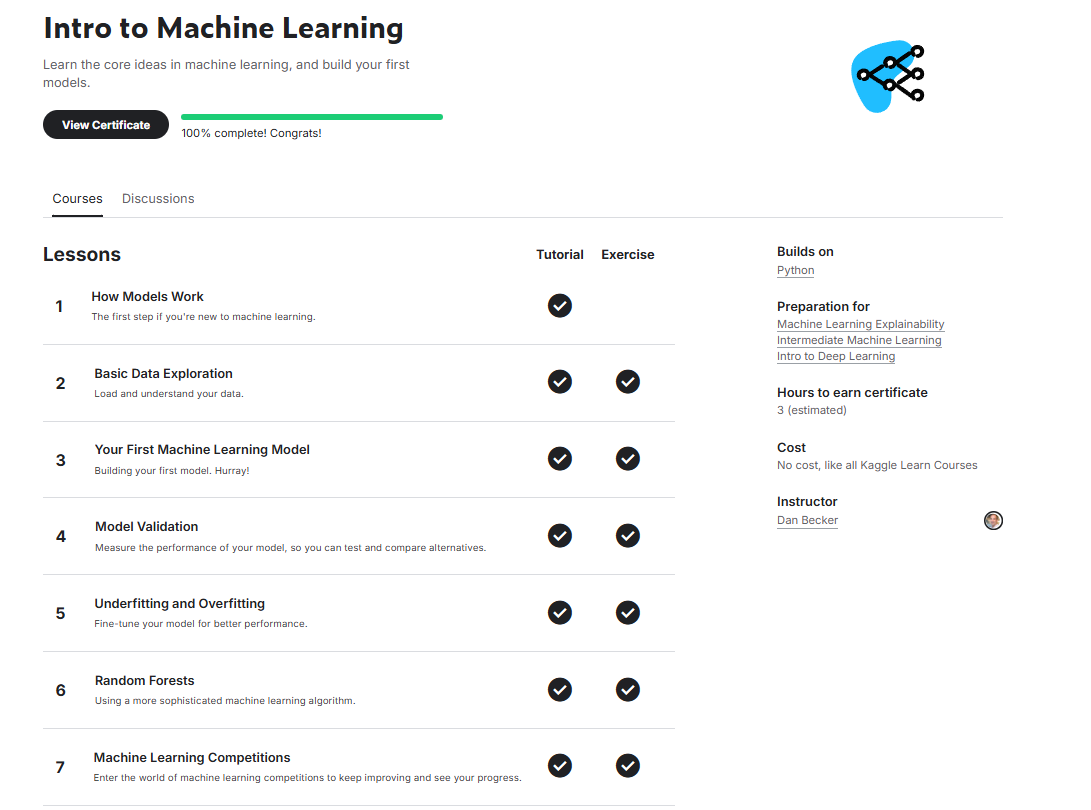

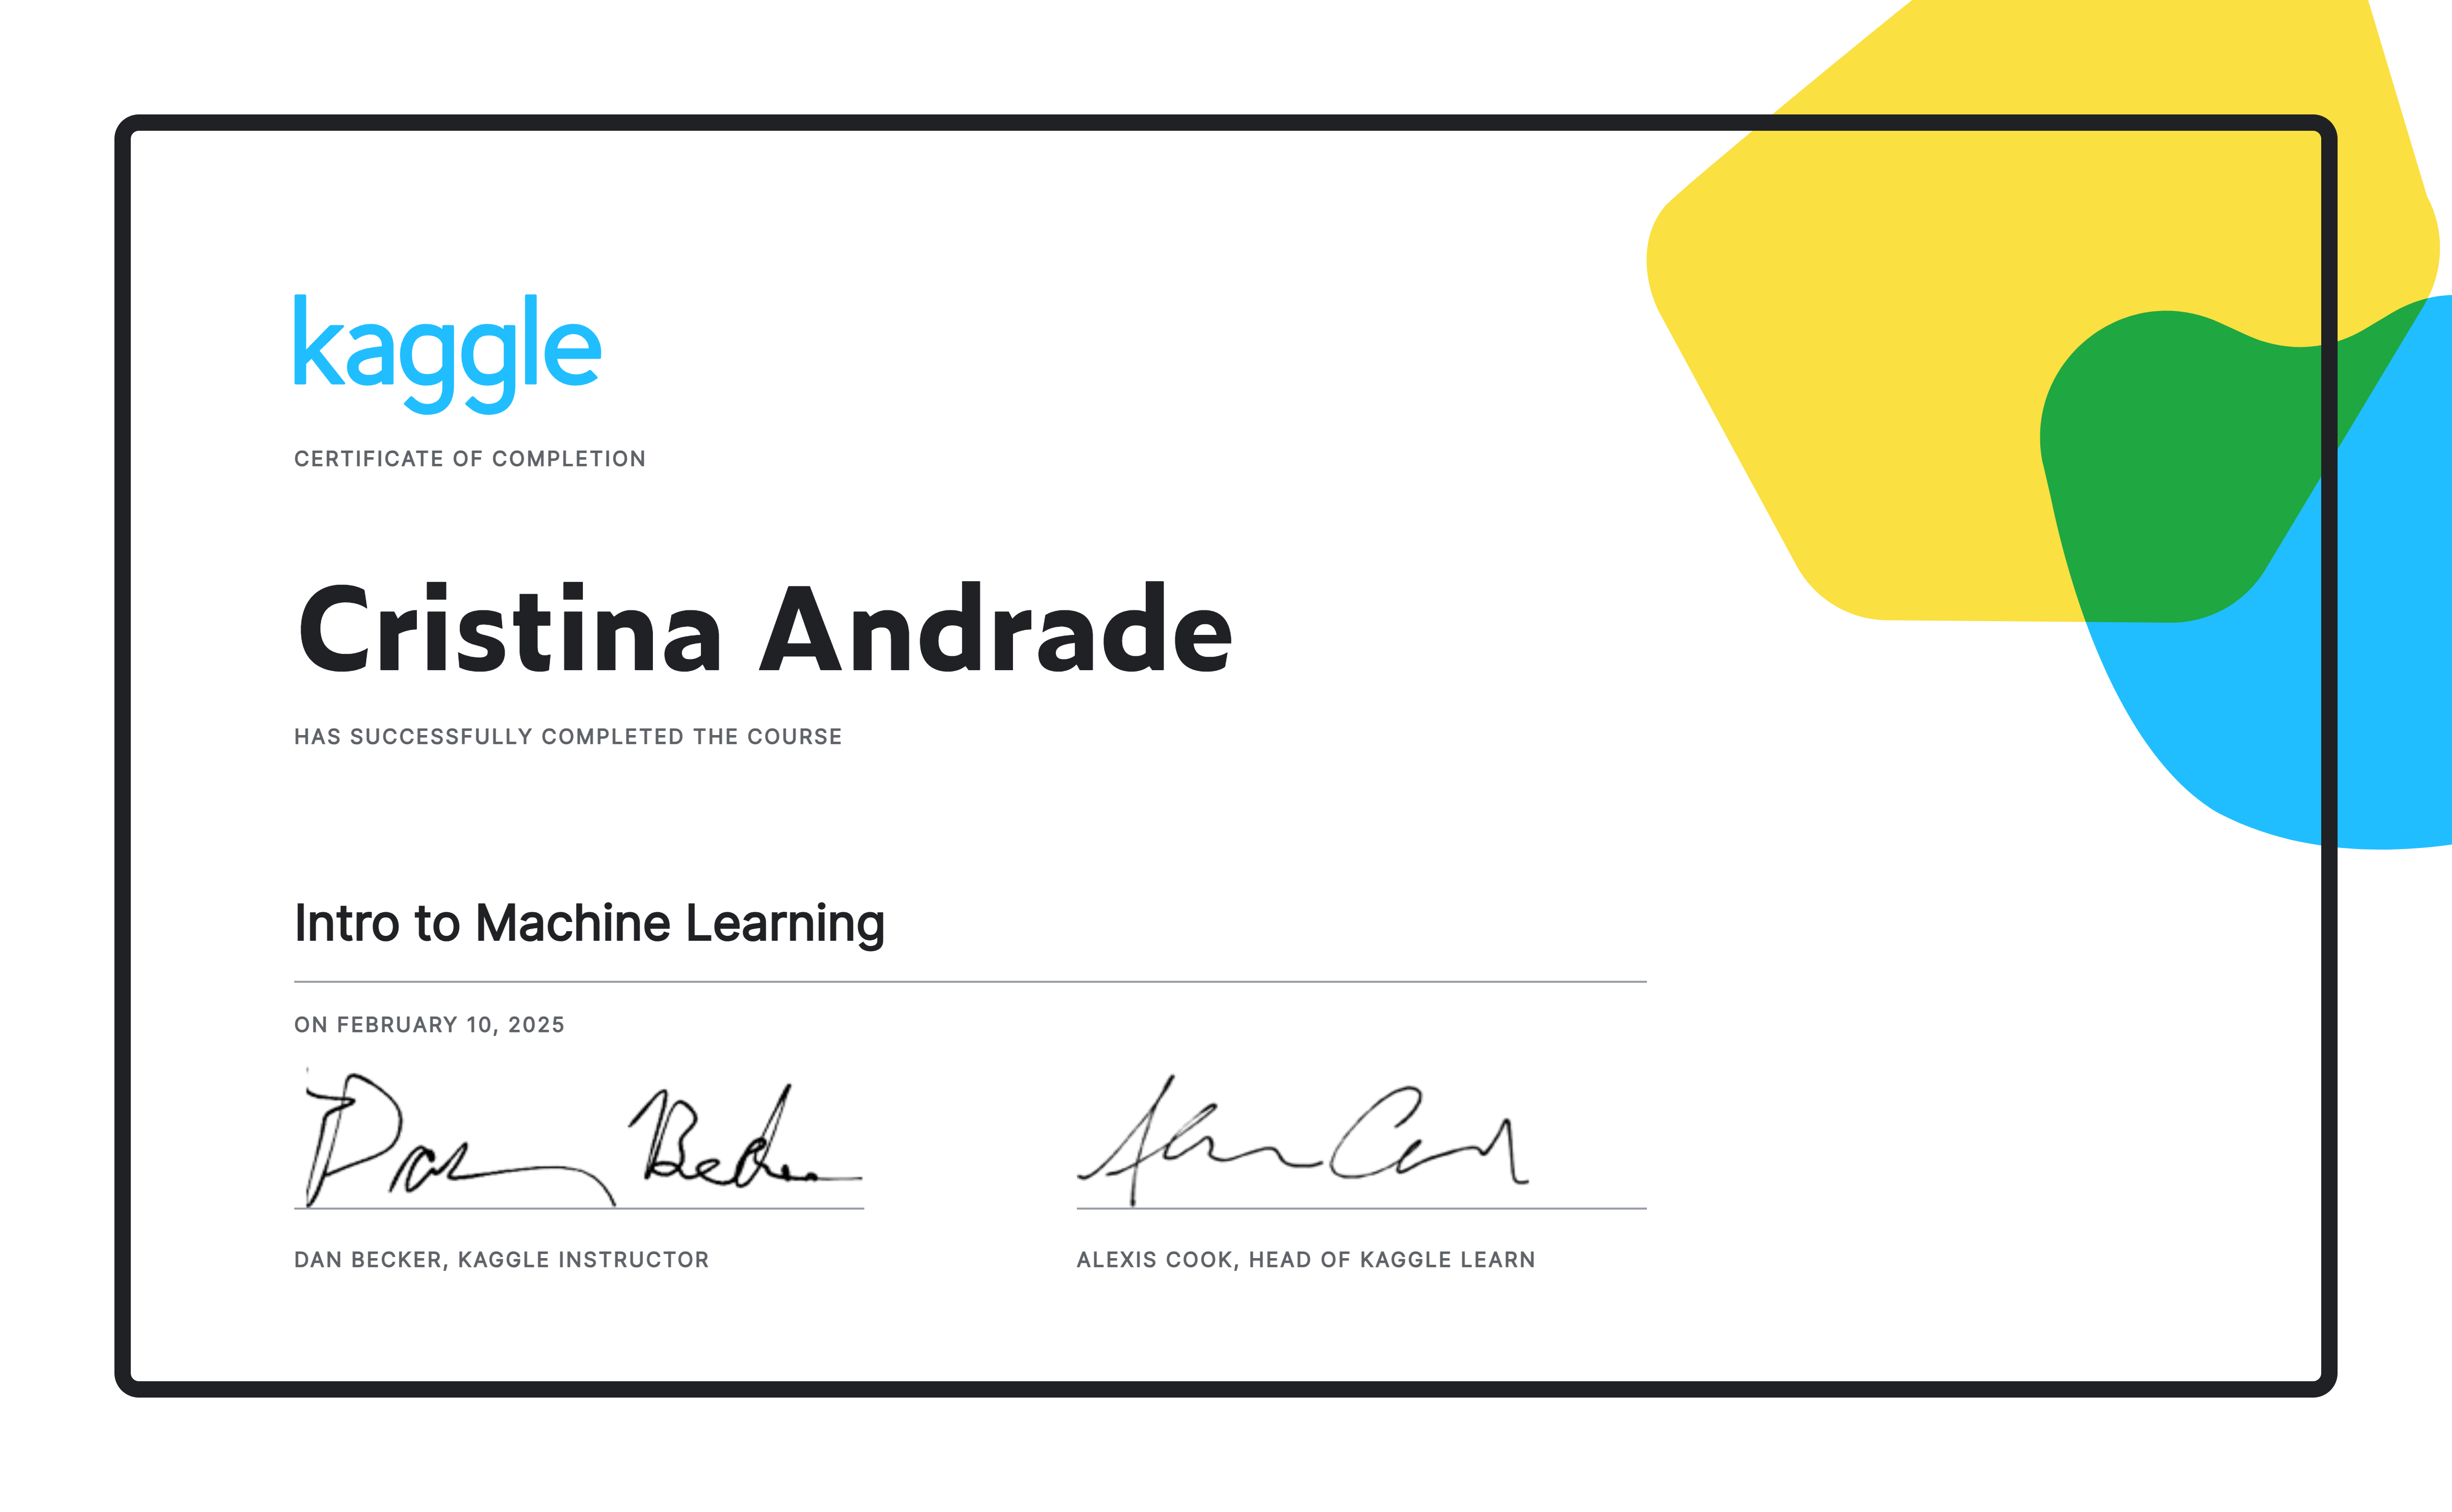



---



Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:
https://www.kaggle.com/datasets/rajyellow46/wine-quality

> 2. Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
:

In [61]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('/content/drive/MyDrive/Algoritmos IA para classificação/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
# Filtrar apenas os vinhos brancos
df_white = df[df["type"] == "white"].copy()
print(df_white.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [63]:
df_white['opinion'] = (df_white['quality'] > 5).astype(int)
df_white.drop(columns=['quality'], inplace=True)

print(df_white.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4



---



> 3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [64]:
print(f"As variaveis e tipos presentes no dataset sao: \n {df_white.dtypes}")

As variaveis e tipos presentes no dataset sao: 
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int64
dtype: object


In [65]:
discretas = []
categoricas = []
continuas = []

for col in df_white.columns:
    if df_white[col].dtype in ['object', 'category']:  # Considera 'category' como categórica
        categoricas.append(col)
    elif df_white[col].dtype in ['int64', 'float64']:  # Se for numérica
        if df_white[col].nunique() > 15:  # Ajustando o limite para detectar variáveis contínuas
            continuas.append(col)
        else:
            discretas.append(col)

print("Variáveis discretas:", discretas)
print("Variáveis categóricas:", categoricas)
print("Variáveis contínuas:", continuas)


Variáveis discretas: ['opinion']
Variáveis categóricas: ['type']
Variáveis contínuas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [66]:
mean_std = df_white.select_dtypes(include=['int64', 'float64'])

medias = mean_std.mean()
desvios = mean_std.std()

resultado = pd.DataFrame({'Média': medias, 'Desvio Padrão': desvios})
print(resultado)


                           Média  Desvio Padrão
fixed acidity           6.855532       0.843808
volatile acidity        0.278252       0.100811
citric acid             0.334250       0.120985
residual sugar          6.393250       5.072275
chlorides               0.045778       0.021850
free sulfur dioxide    35.308085      17.007137
total sulfur dioxide  138.360657      42.498065
density                 0.994027       0.002991
pH                      3.188203       0.151014
sulphates               0.489835       0.114147
alcohol                10.514267       1.230621
opinion                 0.665169       0.471979




---



>4. Com a base escolhida:

a. Descreva as etapas necessárias para criar um modelo de classificação eficiente.

**Etapa inicial: coleta e processamento de dados**

> importamos nossa base de dados e analisamos os dados como tipos de variaveis, e se houver valores nulos faremos o tratamento, transformamos dados categoricos em numericos se houcver. e ai sim aplicamos a normalização ou padronização.

**Separação dos dados**
> Separamos os dados em treino e teste, ondegeralmente 80% dos dados são usados para treino e 20% para teste.

**Escolha do modelo e treinamento**
> Nesta etapa testamos diferentes algoritimos. Regressão logistica caso os dados forem linear e se nao forem lineares, podemos usar a àrvore de decisao. e kn ou  redes neurais se o dataset for mais complexo.

**Otimização e ajuste**

> Apos avaliar, caso seja necessário realizamos ajuste ou otimização do modelo. temos ferramentas como Grid Search, Random Search para encontrar os melhores parâmetros para o modelo.

**Avaliação do modelo**

> Apos obtermos o resultado, avaliamos nosso modelo usamos metricas como precisão,acuracia, matriz de confusão e outras.

**Teste e validação final**

> Com nosso modelo pronto e refinado, fazemos e teste final e se tudo ocorrer bem, validamos e implementamos.






---



b. Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [67]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

X = df_white.drop(columns=["type", "opinion"])
y = df_white["opinion"]


X = X.fillna(X.mean())

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Padronização
    ("logreg", LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000))

])

# Criar validação cruzada estratificada (k=10)
kf = StratifiedKFold(n_splits=10)

In [68]:
print(X.isna().sum())
print(y.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
0


**Regressão Linear e a Regressão Logística**

A regressao linear e usada para prever valores numericos onde seu resultado sao numeros continuos por exemplo prever preco de um produto.

ja a regressao logistica e usada para classificacao, seu resultado e uma probabilidade e convertida para uma categoria. desta forma usaremos para prever se o viho e bom ou ruim por exemplo


> i. a média e desvio da acurácia dos modelos obtidos;

In [69]:
accuracy_scores = cross_val_score(pipeline, X, y, cv=kf)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Média da acurácia: {mean_accuracy}")
print(f"Desvio padrão da acurácia: {std_accuracy}")

Média da acurácia: 0.7137819790492885
Desvio padrão da acurácia: 0.06922465005656062


> ii. a média e desvio da precisão dos modelos obtidos;

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score

y_pred = cross_val_predict(pipeline, X, y, cv=kf)

precision = precision_score(y, y_pred)

mean_precision = np.mean(precision)
std_precision = np.std(precision)


print(f"Média da precisão: { mean_precision}")
print(f"Desvio  desvio da precisão: {std_precision}")

Média da precisão: 0.8452380952380952
Desvio  desvio da precisão: 0.0


> iii. a média e desvio da recall dos modelos obtidos;

In [71]:
from sklearn.metrics import make_scorer, recall_score, f1_score

# Criar os scorers para recall e f1-score
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)

# Calcular recall em cada fold
recall_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=recall_scorer)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_recall, std_recall

(0.6974280320906089, 0.13172638116674878)

> iv. a média e desvio do f1-score dos modelos obtidos.

In [72]:
f1_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=f1_scorer)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

mean_f1, std_f1

(0.7576312592290806, 0.07857367490854085)

In [73]:
from sklearn.metrics import classification_report

pipeline.fit(X, y)
y_pred = pipeline.predict(X)

# Exibir relatório de classificação
print("\n# Análise do Desempenho - Validação Cruzada (Base Completa)")
print(classification_report(y, y_pred))


# Análise do Desempenho - Validação Cruzada (Base Completa)
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      1640
           1       0.85      0.71      0.77      3258

    accuracy                           0.72      4898
   macro avg       0.71      0.73      0.71      4898
weighted avg       0.75      0.72      0.73      4898



c. Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

Melhores parâmetros: {'ccp_alpha': 0.01, 'max_depth': 3, 'min_samples_split': 2}


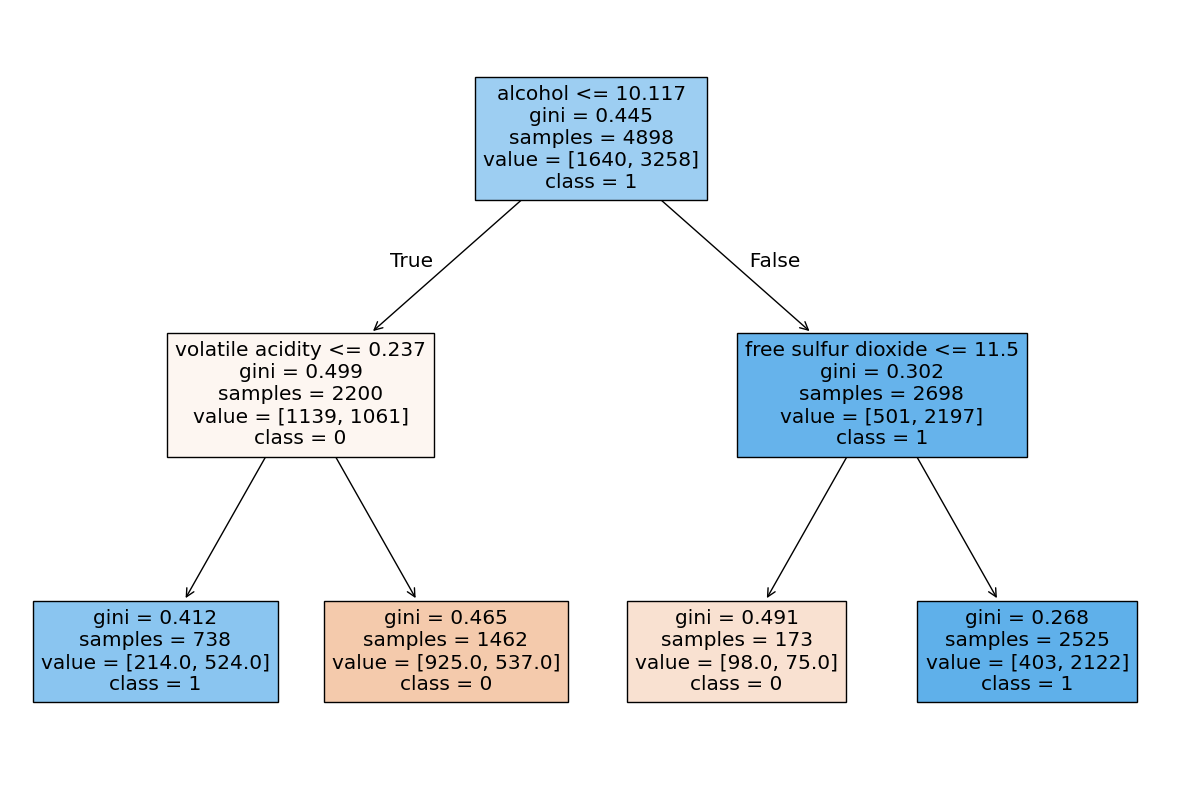

In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Criar o modelo base com hiperparâmetros ajustáveis
param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "ccp_alpha": [0.01, 0.05, 0.1]
}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Aplicar GridSearch para encontrar os melhores parâmetros
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=kf, scoring="f1")
grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")

# Criar modelo final com os melhores hiperparâmetros
modelo_arvore = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
modelo_arvore.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()


> i. a média e desvio da acurácia dos modelos obtidos;

In [75]:
accuracy_scores = cross_val_score(modelo_arvore, X, y, cv=kf, scoring="accuracy")

print(f' Acurácia: {np.std(accuracy_scores):.4f}')
print(f'Média da Acurácia: {np.mean(accuracy_scores):.4f}')

 Acurácia: 0.0179
Média da Acurácia: 0.7381


> ii. a média e desvio da precisão dos modelos obtidos;

In [76]:
precision_scores = cross_val_score(modelo_arvore, X, y, cv=kf, scoring="precision")

print(f'Precisão: {np.std(precision_scores):.4f}')
print(f'Média da Precisão: {np.mean(precision_scores):.4f}')

Precisão: 0.0195
Média da Precisão: 0.7995


> iii. a média e desvio da recall dos modelos obtidos;

In [77]:
recall_scores = cross_val_score(modelo_arvore, X, y, cv=kf, scoring="recall")

print(f'Recall: {np.std(recall_scores):.4f}')
print(f'Média do Recall: {np.mean(recall_scores):.4f}')

Recall: 0.0249
Média do Recall: 0.8103


> iv. a média e desvio do f1-score dos modelos obtidos.

In [78]:
f1_scores = cross_val_score(modelo_arvore, X, y, cv=kf, scoring="f1")

print(f'F1-score: {np.std(f1_scores):.4f}')
print(f'Média do F1-score: {np.mean(f1_scores):.4f}')

F1-score: 0.0135
Média do F1-score: 0.8044


In [79]:
from sklearn.metrics import classification_report
y_pred = modelo_arvore.predict(X)

print("\n# Análise do Desempenho - Validação Cruzada (Base Completa)")
print(classification_report(y, y_pred))



# Análise do Desempenho - Validação Cruzada (Base Completa)
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1640
           1       0.81      0.81      0.81      3258

    accuracy                           0.75      4898
   macro avg       0.72      0.72      0.72      4898
weighted avg       0.75      0.75      0.75      4898



d. Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Criar pipeline com normalização
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# Criar validação cruzada estratificada
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definir hiperparâmetros para otimização
random_params = {
    'svc__C': (0.1, 1, 10),  # Reduzimos de 100 para 30
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__gamma':(0.001, 0.01, 0.1),  # Reduzimos de 5 valores fixos para 30 valores entre 0.001 e 1
}
random_search = RandomizedSearchCV(
    estimator=pipe_svm,  # Passando o pipeline como estimador
    param_distributions=random_params,  # Hiperparâmetros para busca
    n_iter=5,  # Número de combinações testadas
    cv=kf,  # Validação cruzada estratificada
    scoring='accuracy',  # Métrica principal de otimização
    n_jobs=-1,  # Usar múltiplos núcleos
    random_state=42
)

random_search.fit(X, y)

print(f"Melhores parâmetros: {random_search.best_params_}")

# Criar modelo final com os melhores parâmetros
svm_final = random_search.best_estimator_
svm_final.fit(X, y)
yhat = svm_final.predict(X)

Melhores parâmetros: {'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 1}


> i. a média e desvio da acurácia dos modelos obtidos;

In [81]:
# Avaliação com validação cruzada para acurácia
accuracy_scores = cross_val_score(svm_final, X, y, cv=kf, scoring="accuracy"),
# Exibir os resultados
print(f'Desvio padrão da Acurácia: {np.std(accuracy_scores):.4f}')
print(f'Média da Acurácia: {np.mean(accuracy_scores):.4f}')


Desvio padrão da Acurácia: 0.0136
Média da Acurácia: 0.7634


> ii. a média e desvio da precisão dos modelos obtidos;

In [82]:
precision_scores = cross_val_score(svm_final, X, y, cv=kf, scoring="precision")
print(f'Desvio padrão da Precisão: {np.std(precision_scores):.4f}')
print(f'Média da Precisão: {np.mean(precision_scores):.4f}')

Desvio padrão da Precisão: 0.0108
Média da Precisão: 0.7778


> iii. a média e desvio da recall dos modelos obtidos;

In [83]:
recall_scores = cross_val_score(svm_final, X, y, cv=kf, scoring="recall")
print(f'Desvio padrão do Recall: {np.std(recall_scores):.4f}')
print(f'Média do Recall: {np.mean(recall_scores):.4f}')

Desvio padrão do Recall: 0.0156
Média do Recall: 0.9021


> iv. a média e desvio do f1-score dos modelos obtidos.

In [84]:
f1_scores = cross_val_score(svm_final, X, y, cv=kf, scoring="f1")
print(f'Desvio padrão do F1-score: {np.std(f1_scores):.4f}')
print(f'Média do F1-score: {np.mean(f1_scores):.4f}')

Desvio padrão do F1-score: 0.0096
Média do F1-score: 0.8353


In [85]:
print('\nDesempenho - Validação Cruzada (base completa)')
print(classification_report(y, yhat))


Desempenho - Validação Cruzada (base completa)
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1640
           1       0.78      0.90      0.84      3258

    accuracy                           0.77      4898
   macro avg       0.75      0.70      0.72      4898
weighted avg       0.76      0.77      0.76      4898



> 5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

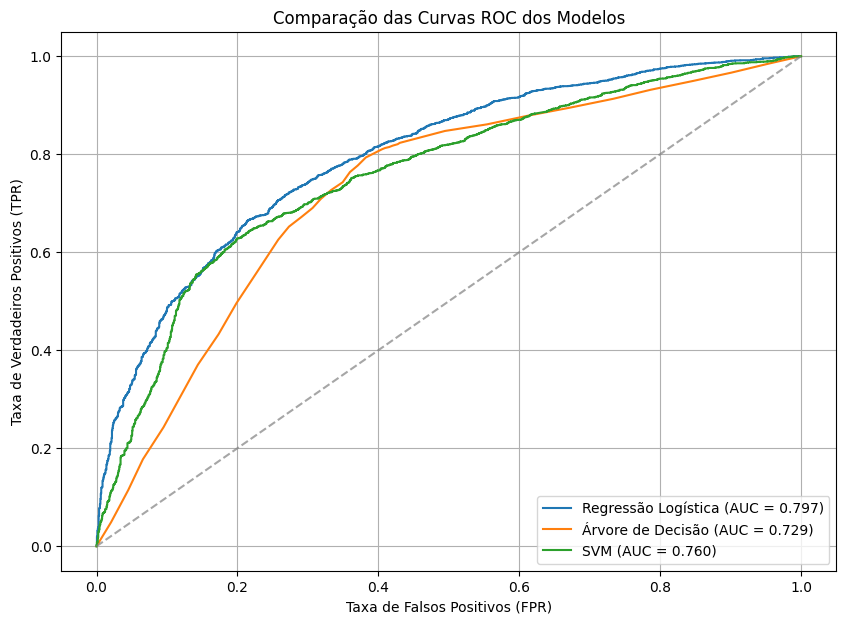

In [94]:
# Reimportar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Criar os modelos
models = {
    "Regressão Logística": LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, min_samples_split=2),
    "SVM": SVC(C=1, kernel='rbf', gamma=0.01, probability=True)
}

# Criar a figura para o gráfico ROC
plt.figure(figsize=(10, 7))
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dicionário para armazenar os AUCs dos modelos
auc_results = {}

# Validação cruzada e cálculo da curva ROC média
for name, model in models.items():
    y_prob = cross_val_predict(model, X, y, cv=kf, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_results[name] = roc_auc  # Armazena a AUC no dicionário

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot da Curva ROC média
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.7)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Comparação das Curvas ROC dos Modelos")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [95]:
melhor_modelo = max(auc_results, key=auc_results.get)
melhor_auc = auc_results[melhor_modelo]

print(f"\nMelhor modelo corrigido: {melhor_modelo} com AUC média = {melhor_auc:.3f}")



Melhor modelo corrigido: Regressão Logística com AUC média = 0.797


>Justificativa:
Os resultados mostram que a Regressão Logística teve a melhor desempenho em separar as classes, com uma AUC de 0.797, maior que os outros modelos. A Curva ROC confirma isso, já que a linha da Regressão Logística fica acima das demais, indicando que o modelo acerta mais positivos sem aumentar tanto os falsos positivos.



---



> 6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

In [105]:
# Recarregar os pacotes necessários
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df_red = df[df["type"] == "red"].copy()

df_red['opinion'] = (df_red['quality'] > 5).astype(int)
df_red.drop(columns=['quality'], inplace=True)

X_pred = df_red.drop(columns=["type", "opinion"])
y_pred = df_red["opinion"]

X_ = X_pred.fillna(X.mean())

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Padronização
    ("logreg", LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000))

])

# Criar validação cruzada estratificada (k=10)
kf = StratifiedKFold(n_splits=10)


# Fazer a inferência usando o modelo "treinado" (simulado)
y_pred_red = pipeline.fit(X_, df_red["opinion"]).predict(X_)

# Contar a quantidade de vinhos bons (1) e ruins (0)
wine_quality_counts = pd.Series(y_pred_red).value_counts().rename(index={0: "Ruim", 1: "Bom"})

# Exibir a distribuição dos vinhos tintos classificados pelo modelo
print("\nDistribuição dos Vinhos Tintos (Inferência com Regressão Logística):")
print(wine_quality_counts.to_frame())



Distribuição dos Vinhos Tintos (Inferência com Regressão Logística):
      count
Ruim    812
Bom     787


In [103]:
# Reimportar os pacotes necessários
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, make_scorer

# Criar validação cruzada estratificada (k=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcular Acurácia
accuracy_scores = cross_val_score(pipeline, X_, y_pred, cv=kf, scoring="accuracy")
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Média da Acurácia: {mean_accuracy:.4f},Desvio Padrão da Acurácia:{std_accuracy:.4f}")

# Calcular Precisão
y_pred_crossval = cross_val_predict(pipeline, X_, y_pred, cv=kf)
precision = precision_score(y_pred, y_pred_crossval)

mean_precision = np.mean(precision)
std_precision = np.std(precision)

print(f"Média da Precisão: {mean_precision:.4f}, Desvio Padrão da Precisão: {std_precision:.4f}")

# Criar os scorers para Recall e F1-score
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)

# Calcular Recall
recall_scores = cross_val_score(pipeline, X_, y_pred, cv=kf, scoring=recall_scorer)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

print(f"Média do Recall: {mean_recall:.4f}, Desvio Padrão do Recall: {std_recall:.4f}")

# Calcular F1-score
f1_scores = cross_val_score(pipeline, X_, y_pred, cv=kf, scoring=f1_scorer)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"Média do F1-score: {mean_f1:.4f},Desvio Padrão do F1-score: {std_f1:.4f}")

pipeline.fit(X_, y_pred)
y_pred_final = pipeline.predict(X_)

print("\n# Análise do Desempenho - Validação Cruzada (Base Completa)")
print(classification_report(y_pred, y_pred_final))

Média da Acurácia: 0.7417,Desvio Padrão da Acurácia:0.0482
Média da Precisão: 0.7805, Desvio Padrão da Precisão: 0.0000
Média do Recall: 0.7192, Desvio Padrão do Recall: 0.0672
Média do F1-score: 0.7475,Desvio Padrão do F1-score: 0.0526

# Análise do Desempenho - Validação Cruzada (Base Completa)
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       744
           1       0.78      0.72      0.75       855

    accuracy                           0.74      1599
   macro avg       0.75      0.75      0.74      1599
weighted avg       0.75      0.74      0.75      1599



> Justificativa: Como vemos,o modelo aplicado agora para vinhos tintos a acuracia foi maior nos tintos do que no vinho branco. porem a precisao foi bem menor no vinho tinto que no vinho branco, isso significa que o modelo errou ao classificar vinhos como bom.Este modelo nao foi tao bom para este modelo

> 7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório